In [109]:
import pandas as pd

In [117]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [952]:
class HousingDataset(Dataset):    
    def __init__(self, df, transform=None):
        #self.dataframe = self.transform(df)
        self.dataframe = df
    
    def standard_scale(self, df):
        scaler = StandardScaler()
        scaler.fit(df)
        data = scaler.transform(df)
        data = pd.DataFrame(data, columns = df.columns)
        return data
    
    def transform(self, df):
        data = self.standard_scale(df)
        return data
        
    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        sample = np.asarray(self.dataframe.iloc[idx])
        x = torch.tensor(sample[:-1])
        label = torch.tensor(sample[-1])
            
        return x,label
        

In [940]:
def get_data(df, batch_size):
    scaler = StandardScaler()
    scaler.fit(df)
    data = scaler.transform(df)
    data = pd.DataFrame(data, columns = df.columns)

    split_idx = int(len(data)*0.9)

    train_data = data[:split_idx]
    test_data = data[split_idx:]

    train_dataset = HousingDataset(train_data)
    test_dataset = HousingDataset(test_data)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size,
                            shuffle=True, num_workers=0)

    test_dataloader = DataLoader(test_dataset, batch_size=51,
                            shuffle=True, num_workers=0)

    #print(f'Train DataLoader:\nLength: {len(train_dataset)}\nBatchsize: {train_dataloader.batch_size}\n-')
    #print(f'Test DataLoader:\nLength: {len(test_dataloader)}\nBatchsize: {test_dataloader.batch_size}')
    
    return train_dataloader, test_dataloader

In [992]:
def train_net(net, train_dataloader, test_dataloader, lr = 0.001, n_epochs = 100, loss_criterion = nn.MSELoss()):

    learning_rate = 0.001

    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    train_losses = torch.zeros(n_epochs)
    iteration_losses = []
    
    eval_losses = torch.zeros(n_epochs)

    current_best_score = None

    for epoch in range(n_epochs):
        # if current_best_score != None:
            # print(current_best_score.item())
        for i_batch, sample_batched in enumerate(train_dataloader):
            x, y = sample_batched
            x,y = x.float(), y.float()

            y = torch.reshape(y, (x.shape[0],1))

            predictions = net(x)

            # Evaluation

            loss = loss_criterion(predictions, y)

            if current_best_score == None:
                current_best_score = loss
                torch.save(net, 'best_model.pt')

            if loss < current_best_score:
                esli = 0
                current_best_score = loss
                torch.save(net, 'best_model.pt')

            train_losses[epoch] = loss
            iteration_losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        for _, sample_batched in enumerate(test_dataloader):
            x, y = sample_batched
            x,y = x.float(), y.float()

            y = torch.reshape(y, (x.shape[0],1))
            
            predictions = net(x)
            eval_loss = loss_criterion(predictions, y)
            eval_losses[epoch] = eval_loss
        
        #if epoch % 10 == 0:
            #print(f'Epoch {epoch} / {n_epochs} Loss: {loss}')
        print('Loss', losses[epoch].item())
        print('Evaluation loss', eval_losses[epoch].item())
        print('-'*20)
    return losses, eval_losses, list_losses


In [993]:
df = pd.read_csv('../data/housing.csv', header=None, delimiter=r"\s+", names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

train_dataloader, test_dataloader = get_data(df, batch_size = 8)

net = nn.Sequential(nn.Linear(13,32), nn.ReLU(),nn.Linear(32,16), nn.ReLU(), nn.Dropout(), nn.Linear(16,1)).float()

losses, eval_losses, iteration_losses = train_net(net, train_dataloader, test_dataloader, lr = 0.001, n_epochs = 200, loss_criterion = nn.MSELoss())


Loss 0.11531853675842285
Evaluation loss 0.19750824570655823
--------------------
Loss 0.5375586748123169
Evaluation loss 0.15480530261993408
--------------------
Loss 0.3842671513557434
Evaluation loss 0.11376561224460602
--------------------
Loss 0.34306254982948303
Evaluation loss 0.18400150537490845
--------------------
Loss 0.2494724690914154
Evaluation loss 0.15743345022201538
--------------------
Loss 0.19855086505413055
Evaluation loss 0.12015290558338165
--------------------
Loss 0.1541975438594818
Evaluation loss 0.14098268747329712
--------------------
Loss 0.20447015762329102
Evaluation loss 0.14445404708385468
--------------------
Loss 0.1842440366744995
Evaluation loss 0.13021503388881683
--------------------
Loss 0.2091258317232132
Evaluation loss 0.1435532122850418
--------------------
Loss 0.204523965716362
Evaluation loss 0.17611347138881683
--------------------
Loss 0.3776412010192871
Evaluation loss 0.17405781149864197
--------------------
Loss 0.3974892497062683
Ev

Loss 0.06694675236940384
Evaluation loss 0.31133750081062317
--------------------
Loss 0.4603212773799896
Evaluation loss 0.5003972053527832
--------------------
Loss 0.14624133706092834
Evaluation loss 0.5562542080879211
--------------------
Loss 0.19738207757472992
Evaluation loss 0.28258028626441956
--------------------
Loss 0.051301512867212296
Evaluation loss 0.46298983693122864
--------------------
Loss 0.2619612216949463
Evaluation loss 0.3222077190876007
--------------------
Loss 0.09923911094665527
Evaluation loss 0.30912089347839355
--------------------
Loss 0.5388749837875366
Evaluation loss 0.3949176073074341
--------------------
Loss 0.1408613920211792
Evaluation loss 0.3068690598011017
--------------------
Loss 0.1727438122034073
Evaluation loss 0.3444414436817169
--------------------
Loss 0.4295097887516022
Evaluation loss 0.3845570981502533
--------------------
Loss 0.42131227254867554
Evaluation loss 0.6853816509246826
--------------------
Loss 0.22327880561351776
Eval

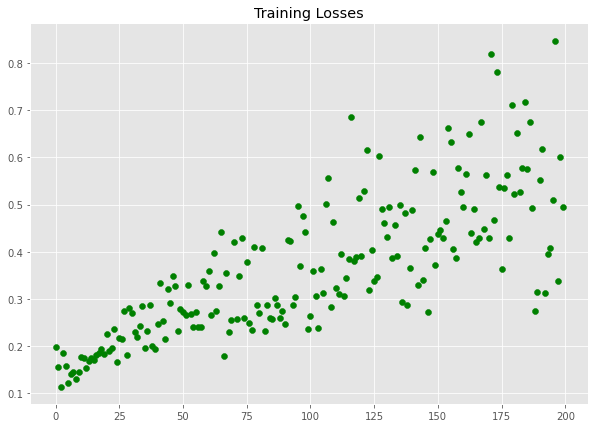

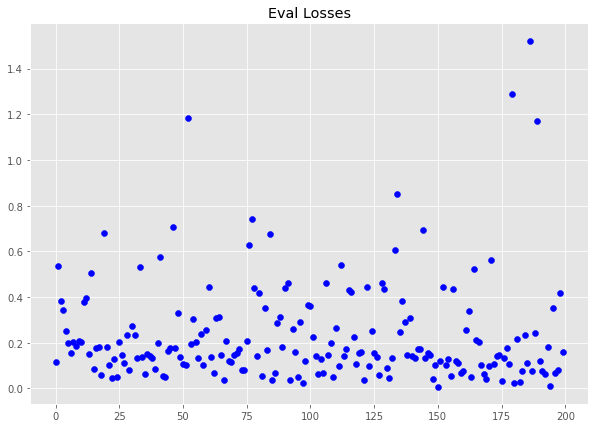

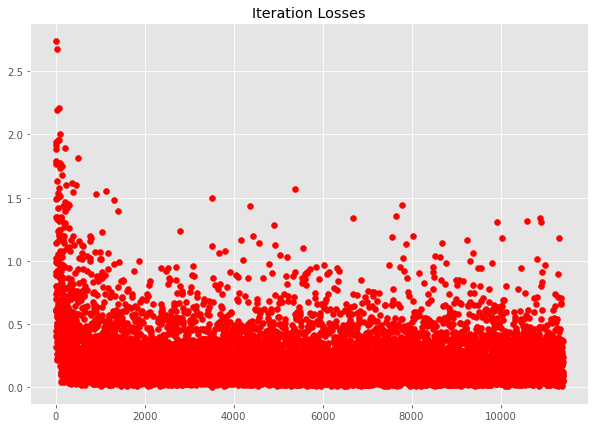

In [997]:
plt.figure(figsize = (10,7))
plt.scatter([i for i in range(len(eval_losses))], [tensor.item() for tensor in eval_losses], c = 'Green')
plt.title('Training Losses')
plt.show()

plt.figure(figsize = (10,7))
plt.scatter([i for i in range(len(losses))], [tensor.item() for tensor in losses], c = 'Blue')
plt.title('Eval Losses')
plt.show()

plt.figure(figsize = (10,7))
plt.scatter([i for i in range(len(iteration_losses))], list(iteration_losses), c = 'Red')
plt.title('Iteration Losses')
plt.show()



In [846]:
model = torch.load('best_model.pt')

In [848]:
model.eval()
predictions = []

for i_batch, sample_batched in enumerate(test_dataloader):
    x, y = sample_batched
    x,y = x.float(), y.float()
    
    prediction = model(x)
    predictions.append((prediction, y))


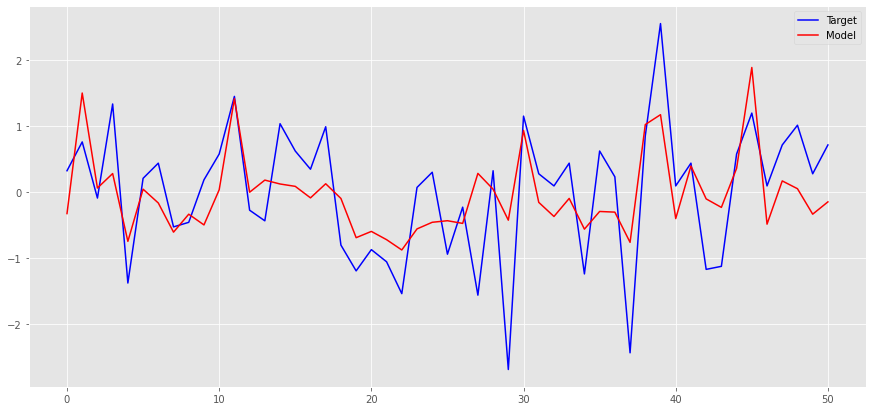

In [849]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,7))
plt.plot([i for i in range(len(predictions))], [i[1] for i in predictions], c = 'blue', label = 'Target')
plt.plot([i for i in range(len(predictions))], [i[0] for i in predictions], c = 'red', label = 'Model')
plt.legend()

plt.show()